## Importing Libraries

In [33]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns



# Miscs
from sklearn.impute import SimpleImputer
import missingno as msno
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import StandardScaler

# Models
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import PolynomialFeatures

# Warning
import warnings
warnings.filterwarnings('ignore')

## Imported Dataset

In [34]:
data = pd.read_csv("train.csv")

In [35]:
data.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [36]:
data.shape

(1460, 81)

In [37]:
data.isnull().sum()

Id                 0
MSSubClass         0
MSZoning           0
LotFrontage      259
LotArea            0
                ... 
MoSold             0
YrSold             0
SaleType           0
SaleCondition      0
SalePrice          0
Length: 81, dtype: int64

In [38]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

## Data Preparation

In [39]:
data = data.drop('Id', axis=1)

In [40]:
data.shape

(1460, 80)

In [41]:
data.head(3)

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500


## EDA

In [42]:
data.drop_duplicates(inplace = True)

In [43]:
data.dtypes.value_counts()

object     43
int64      34
float64     3
Name: count, dtype: int64

## Numerical Categories

In [44]:
numerical_features = list(data.select_dtypes(include=['float64', 'int64']).columns)
print (numerical_features)

['MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces', 'GarageYrBlt', 'GarageCars', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal', 'MoSold', 'YrSold', 'SalePrice']


## Categorical Categories

In [45]:
categorical_features = list(data.select_dtypes(exclude=['float64', 'int64']).columns)
print (categorical_features)

['MSZoning', 'Street', 'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'Heating', 'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual', 'Functional', 'FireplaceQu', 'GarageType', 'GarageFinish', 'GarageQual', 'GarageCond', 'PavedDrive', 'PoolQC', 'Fence', 'MiscFeature', 'SaleType', 'SaleCondition']


In [46]:
data.describe

<bound method NDFrame.describe of       MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
0             60       RL         65.0     8450   Pave   NaN      Reg   
1             20       RL         80.0     9600   Pave   NaN      Reg   
2             60       RL         68.0    11250   Pave   NaN      IR1   
3             70       RL         60.0     9550   Pave   NaN      IR1   
4             60       RL         84.0    14260   Pave   NaN      IR1   
...          ...      ...          ...      ...    ...   ...      ...   
1455          60       RL         62.0     7917   Pave   NaN      Reg   
1456          20       RL         85.0    13175   Pave   NaN      Reg   
1457          70       RL         66.0     9042   Pave   NaN      Reg   
1458          20       RL         68.0     9717   Pave   NaN      Reg   
1459          20       RL         75.0     9937   Pave   NaN      Reg   

     LandContour Utilities LotConfig  ... PoolArea PoolQC  Fence MiscFeature  \
0        

In [47]:
numeric_df = data.select_dtypes(include=['float','int'])
numeric_df.corr()

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
MSSubClass,1.000000,-0.386347,-0.139781,0.032628,-0.059316,0.027850,0.040581,0.022936,-0.069836,-0.065649,...,-0.012579,-0.006100,-0.012037,-0.043825,-0.026030,0.008283,-0.007683,-0.013585,-0.021407,-0.084284
LotFrontage,-0.386347,1.000000,0.426095,0.251646,-0.059213,0.123349,0.088866,0.193458,0.233633,0.049900,...,0.088521,0.151972,0.010700,0.070029,0.041383,0.206167,0.003368,0.011200,0.007450,0.351799
LotArea,-0.139781,0.426095,1.000000,0.105806,-0.005636,0.014228,0.013788,0.104160,0.214103,0.111170,...,0.171698,0.084774,-0.018340,0.020423,0.043160,0.077672,0.038068,0.001205,-0.014261,0.263843
OverallQual,0.032628,0.251646,0.105806,1.000000,-0.091932,0.572323,0.550684,0.411876,0.239666,-0.059119,...,0.238923,0.308819,-0.113937,0.030371,0.064886,0.065166,-0.031406,0.070815,-0.027347,0.790982
OverallCond,-0.059316,-0.059213,-0.005636,-0.091932,1.000000,-0.375983,0.073741,-0.128101,-0.046231,0.040229,...,-0.003334,-0.032589,0.070356,0.025504,0.054811,-0.001985,0.068777,-0.003511,0.043950,-0.077856
YearBuilt,0.027850,0.123349,0.014228,0.572323,-0.375983,1.000000,0.592855,0.315707,0.249503,-0.049107,...,0.224880,0.188686,-0.387268,0.031355,-0.050364,0.004950,-0.034383,0.012398,-0.013618,0.522897
YearRemodAdd,0.040581,0.088866,0.013788,0.550684,0.073741,0.592855,1.000000,0.179618,0.128451,-0.067759,...,0.205726,0.226298,-0.193919,0.045286,-0.038740,0.005829,-0.010286,0.021490,0.035743,0.507101
MasVnrArea,0.022936,0.193458,0.104160,0.411876,-0.128101,0.315707,0.179618,1.000000,0.264736,-0.072319,...,0.159718,0.125703,-0.110204,0.018796,0.061466,0.011723,-0.029815,-0.005965,-0.008201,0.477493
BsmtFinSF1,-0.069836,0.233633,0.214103,0.239666,-0.046231,0.249503,0.128451,0.264736,1.000000,-0.050117,...,0.204306,0.111761,-0.102303,0.026451,0.062021,0.140491,0.003571,-0.015727,0.014359,0.386420
BsmtFinSF2,-0.065649,0.049900,0.111170,-0.059119,0.040229,-0.049107,-0.067759,-0.072319,-0.050117,1.000000,...,0.067898,0.003093,0.036543,-0.029993,0.088871,0.041709,0.004940,-0.015211,0.031706,-0.011378


## Data cleaning

In [48]:
duplicate_columns = data.columns[data.columns.duplicated()]
if len(duplicate_columns)>0:
    print("duplicate_columns:",duplicate_columns)
else:
    print("No duplicate columns:",)

No duplicate columns:


In [49]:
duplicate_rows = data[data.duplicated()]
if not duplicate_rows.empty:
    print("duplicate_rows:")
    print(duplicate_rows)
else:
    print("No duplicate rows:",)

No duplicate rows:


In [50]:
!pip install missingno --quiet


[notice] A new release of pip is available: 24.1.1 -> 24.2
[notice] To update, run: C:\Users\Niraj\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip


In [51]:
import missingno as msno

<Axes: >

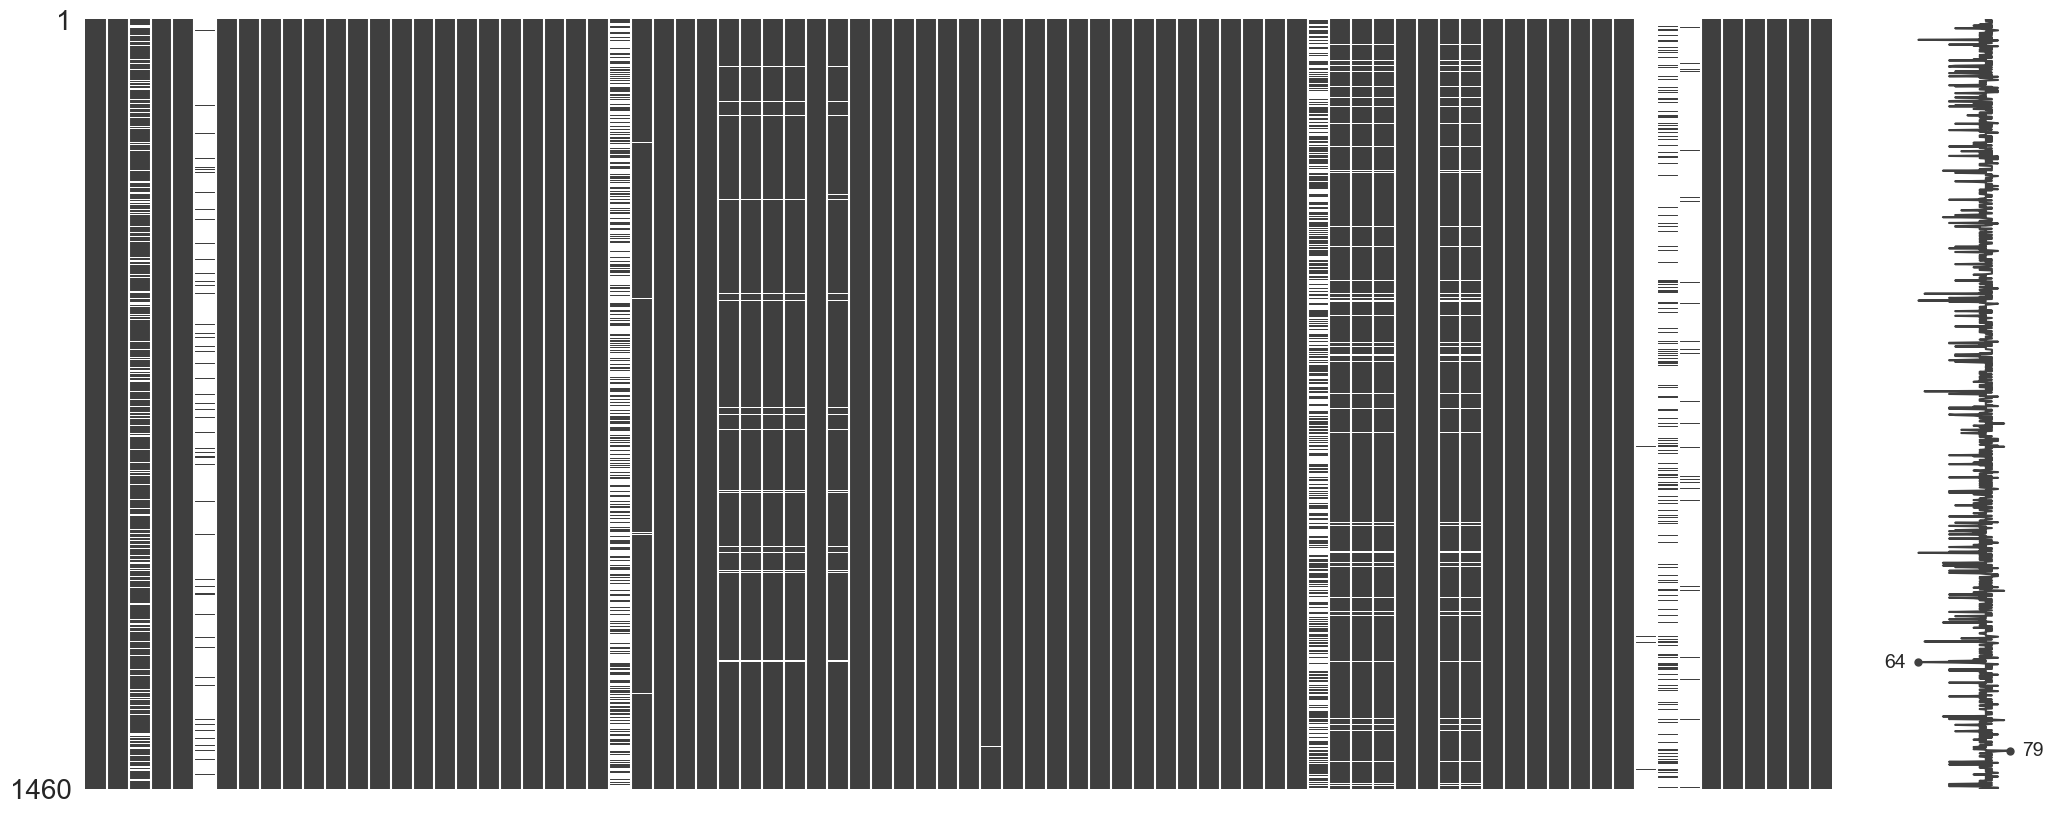

In [52]:
msno.matrix(data)

In [53]:
imputer = SimpleImputer(missing_values = np.nan, strategy='mean')
null_numerical_columns = ['LotFrontage','MasVnrArea', 'GarageYrBlt']
imputer.fit(data[null_numerical_columns])
data[null_numerical_columns] = imputer.transform(data[null_numerical_columns])

In [54]:
imputer = SimpleImputer(missing_values= np.nan,strategy =  'most_frequent')
null_categorical_columns = ['Alley', 'MasVnrType', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'Electrical', 'FireplaceQu', 'GarageType', 'GarageFinish', 'GarageQual', 'GarageCond', 'PoolQC', 'Fence', 'MiscFeature']
imputer.fit(data[null_categorical_columns])
data[null_categorical_columns] = imputer.transform(data[null_categorical_columns])

In [55]:
data.isnull().sum()

MSSubClass       0
MSZoning         0
LotFrontage      0
LotArea          0
Street           0
                ..
MoSold           0
YrSold           0
SaleType         0
SaleCondition    0
SalePrice        0
Length: 80, dtype: int64

In [56]:
dummies = pd.get_dummies(data[categorical_features], drop_first = True)

data = pd.concat([data , dummies],axis = 1)

data.drop(categorical_features, axis = 1, inplace= True)

data.head()

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,...,SaleType_ConLI,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
0,60,65.0,8450,7,5,2003,2003,196.0,706,0,...,False,False,False,False,True,False,False,False,True,False
1,20,80.0,9600,6,8,1976,1976,0.0,978,0,...,False,False,False,False,True,False,False,False,True,False
2,60,68.0,11250,7,5,2001,2002,162.0,486,0,...,False,False,False,False,True,False,False,False,True,False
3,70,60.0,9550,7,5,1915,1970,0.0,216,0,...,False,False,False,False,True,False,False,False,False,False
4,60,84.0,14260,8,5,2000,2000,350.0,655,0,...,False,False,False,False,True,False,False,False,True,False


## Plotting Relationship into variables

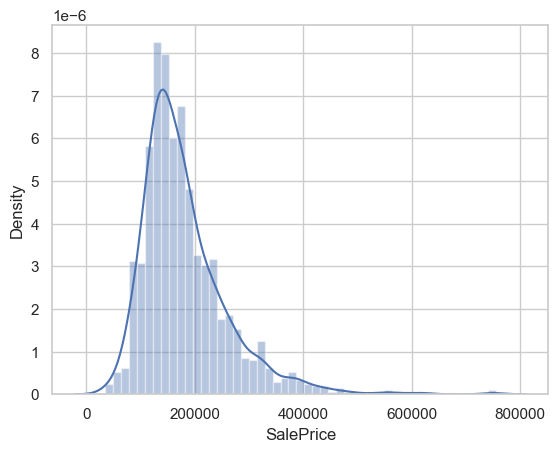

In [57]:
sns.distplot(data['SalePrice']);


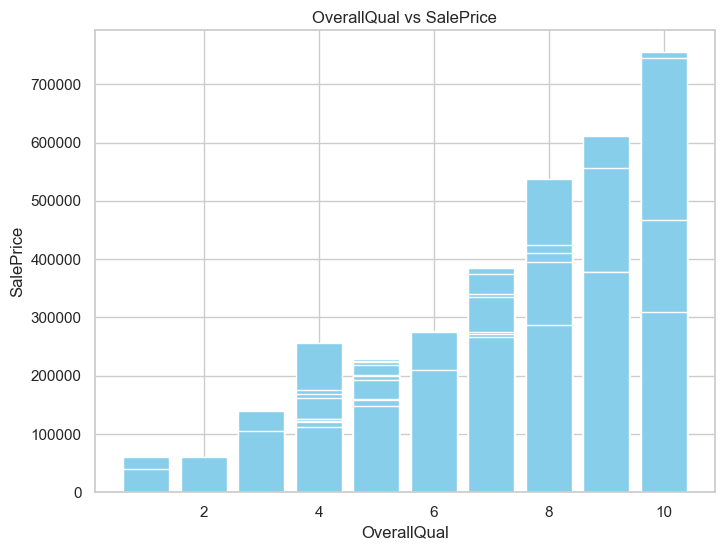

In [58]:
plt.figure(figsize=(8,6))
plt.bar(data['OverallQual'],data['SalePrice'],color = 'skyblue')
plt.xlabel('OverallQual')
plt.ylabel('SalePrice')
plt.title('OverallQual vs SalePrice')

plt.show()

SalePrice vs Yearbuilt

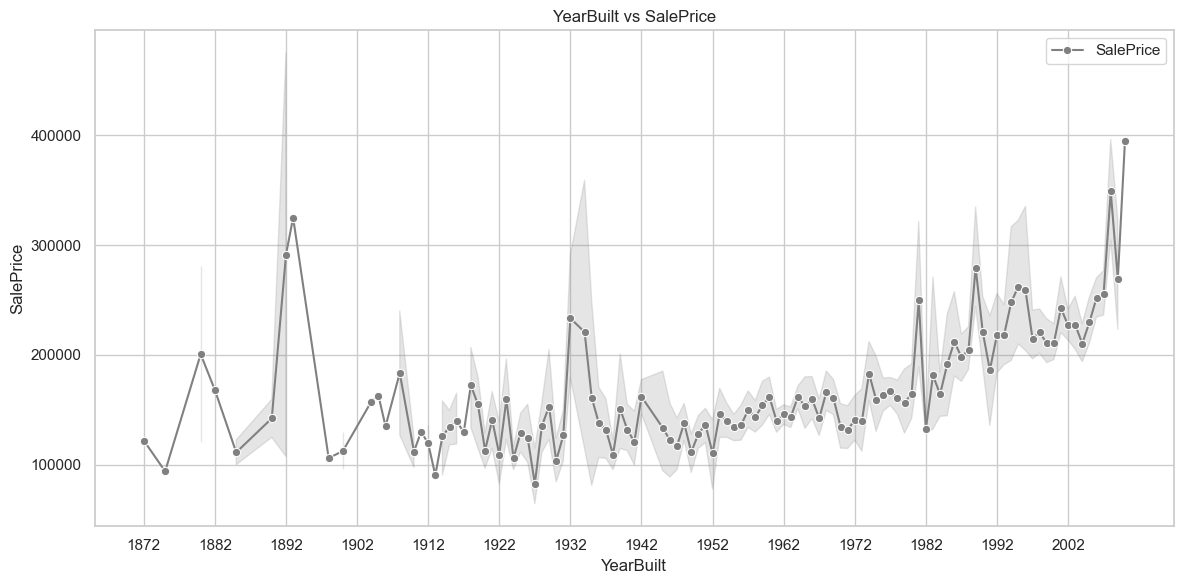

In [59]:
plt.figure(figsize=(12,6))

sns.lineplot(x="YearBuilt", y="SalePrice", data = data, label='SalePrice', marker='o', color='grey')

plt.title("YearBuilt vs SalePrice")
plt.xlabel("YearBuilt")
plt.ylabel("SalePrice")

plt.xticks(range(min(data['YearBuilt']), max(data['YearBuilt']) +1, 10))

plt.legend()
plt.tight_layout()
plt.show()

saleprice vs GargeCars

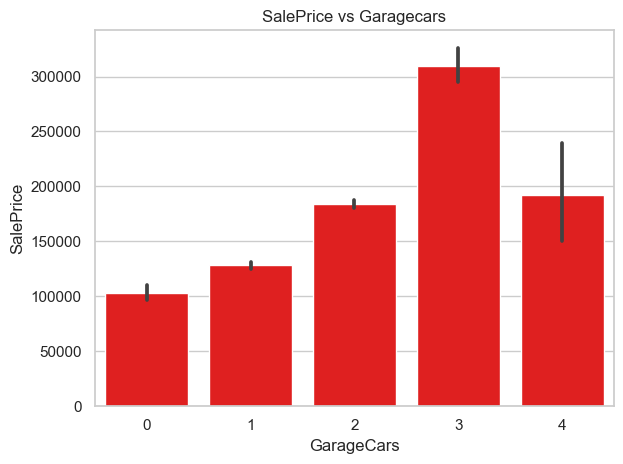

In [60]:
sns.set(style='whitegrid')
ax = sns.barplot( x = "GarageCars" , y = "SalePrice", data = data , color= 'red')
plt.title("SalePrice vs Garagecars")
ax.set_xlabel("GarageCars")
ax.set_ylabel("SalePrice")
plt.tight_layout()
plt.show()


## Machine Learning 

In [61]:
 x = data.drop('SalePrice', axis = 1)
 y = data['SalePrice']

In [62]:
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size = 0.2, random_state = 42)

In [64]:
sc = StandardScaler()
x_train = sc.fit_transform(x_train)
x_test = sc.transform(x_test)

In [67]:
models = {
    "Multiple Linear Regression" : LinearRegression(),
    "Polynomial Regression" : LinearRegression(),
    "Support Vector Regression" : SVR(),
    "Decision Tree Regression" : DecisionTreeRegressor(),
    "Random Forest Regression" : RandomForestRegressor()
}

poly_degree = 2

cv_scores = {}

for model_name, model in models.items():
    if model_name == "Polynomial Regression" : 
        poly_features = PolynomialFeatures(degree=poly_degree)
        x_train_poly = poly_features.fit_transform(x_train)
        scores = cross_val_score(model, x_train_poly, y_train, scoring="neg_mean_squared_error", cv=5)
    else:
        scores = cross_val_score(model, x_train, y_train, scoring="neg_mean_squared_error", cv=5)
    
    mse_scores = -scores  # Convert negative MSE scores to positive
    cv_scores[model_name] = mse_scores.mean()

best_model_name = min(cv_scores, key=cv_scores.get)
best_model = models[best_model_name]

# Train the best model
if best_model_name == "Polynomial Regression":
    poly_features = PolynomialFeatures(degree=poly_degree)
    x_train_poly = poly_features.fit_transform(x_train)
    best_model.fit(x_train_poly, y_train)
else:
    best_model.fit(x_train, y_train)

# Evaluate the best model on the test dataset
if best_model_name == "Polynomial Regression":
    x_test_poly = poly_features.transform(x_test)
    y_pred = best_model.predict(y_test_poly)
else:
    y_pred = best_model.predict(x_test)

# Calculate Mean Squared Error on the test dataset
mse = mean_squared_error(y_test, y_pred)

print(f"Best Model: {best_model_name}")
print(f"Mean Squared Error on Test Data: {mse}")


Best Model: Random Forest Regression
Mean Squared Error on Test Data: 822618268.8002527


In [68]:
# Create a dictionary to store the cross-validation scores and test MSE for each model
results = {
    "Model": [],
    "Cross-Validation MSE": [],
    "Test MSE": []
}

for model_name, model in models.items():
    # Cross-validation
    if model_name == "Polynomial Regression":
        poly_features = PolynomialFeatures(degree=poly_degree)
        x_train_poly = poly_features.fit_transform(x_train)
        scores = cross_val_score(model, x_train_poly, y_train, scoring="neg_mean_squared_error", cv=5)
    else:
        scores = cross_val_score(model, x_train, y_train, scoring="neg_mean_squared_error", cv=5)
    
    mse_scores = -scores  # Convert negative MSE scores to positive
    cv_mse_mean = mse_scores.mean()
    
    # Train and evaluate on the test data
    if model_name == "Polynomial Regression":
        poly_features = PolynomialFeatures(degree=poly_degree)
        x_train_poly = poly_features.fit_transform(x_train)
        model.fit(x_train_poly, y_train)
        x_test_poly = poly_features.transform(x_test)
        y_pred = model.predict(x_test_poly)
    else:
        model.fit(x_train, y_train)
        y_pred = model.predict(x_test)
    
    test_mse = mean_squared_error(y_test, y_pred)
    
    # Store the results in the dictionary
    results["Model"].append(model_name)
    results["Cross-Validation MSE"].append(cv_mse_mean)
    results["Test MSE"].append(test_mse)

# Create a DataFrame from the results dictionary
results_df = pd.DataFrame(results)

# Display the results table
print(results_df)


                        Model  Cross-Validation MSE      Test MSE
0  Multiple Linear Regression          6.461566e+33  8.513501e+23
1       Polynomial Regression          2.822613e+09  1.251307e+09
2   Support Vector Regression          6.242792e+09  7.858365e+09
3    Decision Tree Regression          2.120748e+09  1.774636e+09
4    Random Forest Regression          9.675426e+08  8.069192e+08


In [69]:
regressor = RandomForestRegressor(n_estimators = 10, random_state = 0)
regressor.fit(x_train, y_train)

RandomForestRegressor(n_estimators=10, random_state=0)

In [70]:
y_pred = regressor.predict(x_test)

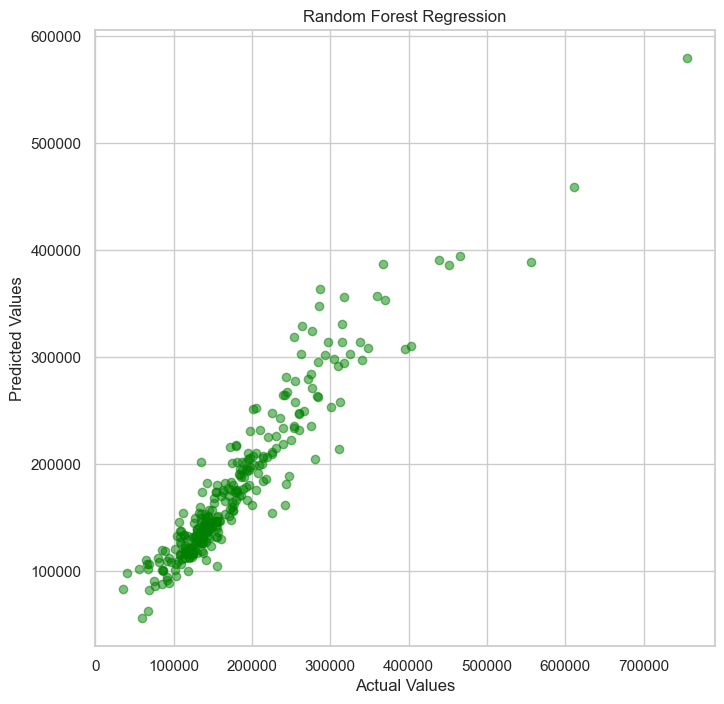

In [71]:
plt.figure(figsize=(8, 8))
plt.scatter(y_test, y_pred, alpha=0.5, color = 'green')
plt.xlabel("Actual Values")
plt.ylabel("Predicted Values")
plt.title("Random Forest Regression")
plt.grid(True)
plt.show()

In [72]:
r2_score(y_test, y_pred)

0.8809131347635598